In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
save_folder = '/content/drive/MyDrive/PCABITTER/'

On essaye de reproduire les résultats de https://doi.org/10.1038/s41586-024-07834-x à l'aide de python. (original réalisé via R)

In [3]:
!pip3 install pyreadr
 #pour pouvoir enregistrer automatiquement les figures

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.7/411.7 kB 5.5 MB/s eta 0:00:00


In [4]:
pip install altair_saver

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.3/89.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 844.5/844.5 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 19.8 MB/s eta 0:00:00


In [5]:
from altair_saver import save

In [6]:
import pyreadr
result = pyreadr.read_r('/content/drive/MyDrive/orch2021_Downsampled_ECage_Filtered.RData') # also works for Rds

In [7]:
df=result.copy()
df

OrderedDict([('samps',
                                          full.sample.name   sample cage tpt treatment  \
              rownames                                                                   
              tp1_F1_E1_downsamped    tp1_F1_E1_downsamped   tp1_E1   E1   1         E   
              tp1_F1_E10_downsamped  tp1_F1_E10_downsamped  tp1_E10  E10   1         E   
              tp1_F1_E11_downsamped  tp1_F1_E11_downsamped  tp1_E11  E11   1         E   
              tp1_F1_E12_downsamped  tp1_F1_E12_downsamped  tp1_E12  E12   1         E   
              tp1_F1_E2_downsamped    tp1_F1_E2_downsamped   tp1_E2   E2   1         E   
              ...                                      ...      ...  ...  ..       ...   
              tp9_F1_E5_downsamped    tp9_F1_E5_downsamped   tp9_E5   E5   9         E   
              tp9_F1_E6_downsamped    tp9_F1_E6_downsamped   tp9_E6   E6   9         E   
              tp9_F1_E7_downsamped    tp9_F1_E7_downsamped   tp9_E7   E7   9 

In [8]:
import pandas as pd
import altair as alt
from sklearn.decomposition import PCA


In [9]:
afmat=df['afmat']
sites=df['sites']
samsp=df['samps']

samsp=samsp.rename(columns={"tpt": "Timepoint"})

timepoints = samsp.loc[afmat.columns, 'Timepoint'].values

pca = PCA(n_components=2)
pca.fit(afmat.T)  # Transpose pour que les échantillons soient en lignes
to_plot = pca.transform(afmat.T)

In [10]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.06537953 0.04688265]
[106.64961643  90.31179217]


In [11]:
df_plot=samsp.copy()
df_plot['PC1'] = to_plot[:, 0]
df_plot['PC2'] = to_plot[:, 1]
df_plot #regarde en detail le df

,full.sample.name,sample,cage,Timepoint,treatment,biol.rep,tech.rep,PC1,PC2
rownames,,,,,,,,,
tp1_F1_E1_downsamped,tp1_F1_E1_downsamped,tp1_E1,E1,1,E,No,No,10.203008,-19.652159
tp1_F1_E10_downsamped,tp1_F1_E10_downsamped,tp1_E10,E10,1,E,No,No,11.008764,-4.057587
tp1_F1_E11_downsamped,tp1_F1_E11_downsamped,tp1_E11,E11,1,E,No,No,8.600171,-0.761345
tp1_F1_E12_downsamped,tp1_F1_E12_downsamped,tp1_E12,E12,1,E,No,No,11.097871,4.098502
tp1_F1_E2_downsamped,tp1_F1_E2_downsamped,tp1_E2,E2,1,E,No,No,9.766145,-2.004254
...,...,...,...,...,...,...,...,...,...
tp9_F1_E5_downsamped,tp9_F1_E5_downsamped,tp9_E5,E5,9,E,No,No,10.132866,15.974846
tp9_F1_E6_downsamped,tp9_F1_E6_downsamped,tp9_E6,E6,9,E,No,No,0.527527,-4.205965
tp9_F1_E7_downsamped,tp9_F1_E7_downsamped,tp9_E7,E7,9,E,No,No,-8.460418,0.899288


In [12]:
alt.Chart(df_plot).mark_point().encode(
    x='PC1',
    y='PC2',
    color=alt.Color('Timepoint', scale=alt.Scale(scheme='turbo'))
)

alt.Chart(...)

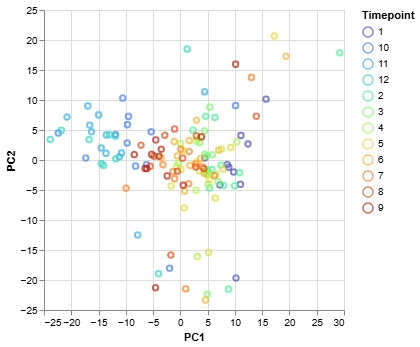

In [13]:
alt.Chart(df_plot).mark_point().encode(
    x='PC1',
    y='PC2',
    color=alt.Color('cage', scale=alt.Scale(scheme='turbo'))
)

alt.Chart(...)

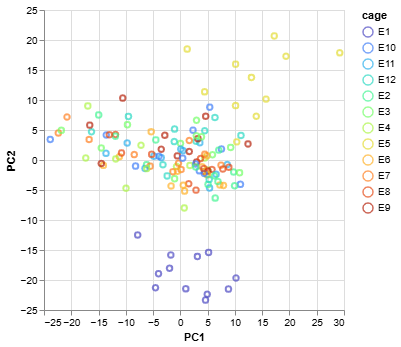

In [14]:
#Maintenant on veut faire des PCA pour chaque chromosome
#afmat
#sites
#On veut regrouper les données de PCA selon le chromosome
#sites2 = sites.transpose()
#print(len(sites))
afmat2 = afmat.copy()

In [15]:
#sites2["nom du chromosome"]["position"]
#afmat2["numéro SNP"]["valeur SNP selon génome 1-139"]
poschrom=sites.groupby(['chrom']).count()
poschrom
#On sait qu'on a en tout 1975162 SNP et qu'ils sont dans l'ordre de séquençage des chromosomes.
#Donc 2L va de [0-453444] 2R de [453445-827200] 3L [827201-1272657] 3R[1272658-1720665] X[1720666-1975162]
#En connaissant la taille des chromosomes selon leur nb de pos, on peut déduire les subset de données qu'ils constituent dans le df initial.
#On peut ensuite diviser le subset initial selon cette taille et run des PCA selon chaque chromosome.
df_2L=afmat.iloc[0:453444]
df_2R=afmat.iloc[453445:827200]
df_3L=afmat.iloc[827201:1272657]
df_3R=afmat.iloc[1272658:1720665]
df_X=afmat.iloc[1720666-1975162]
list_chr=[df_2L,df_2R,df_3L,df_3R,df_X]
name_chr=['2L','2R','3L','3R','X']
#On sub run des PCA sur ces différents datasets par la suite.

In [19]:
#On automatise les PCA.
#pcax=PCA(n_components=2)
#for i in range(5):
 # pcax.fit(list_chr[i].T)
 # toplot=pcax.transform(list_chr[i].T)
#  plot_chr=samsp.copy()
 # plot_chr['PC1']=toplot[:,0]
#  plot_chr['PC2']=toplot[:,1]
#  alt.Chart(plot_chr,title=name_chr[i]).mark_point().encode(
  #  x='PC1',
   # y='PC2',
   # color=alt.Color('cage', scale=alt.Scale(scheme='turbo')))



In [20]:
pca2L=PCA(n_components=2)
pca2L.fit(df_2L.T)
tplt2L=pca2L.transform(df_2L.T)
print(pca2L.explained_variance_ratio_)
print(pca2L.singular_values_)

[0.07914403 0.07051901]
[57.60106058 54.37189689]


In [21]:
plt2L=samsp.copy()
plt2L['PC1']=tplt2L[:,0]
plt2L['PC2']=tplt2L[:,1]

alt.Chart(plt2L).mark_point().encode(
    x='PC1',
    y='PC2',
    color=alt.Color('cage', scale=alt.Scale(scheme='turbo'))
)
#E5 et E1 se regroupent ensemble.

alt.Chart(...)

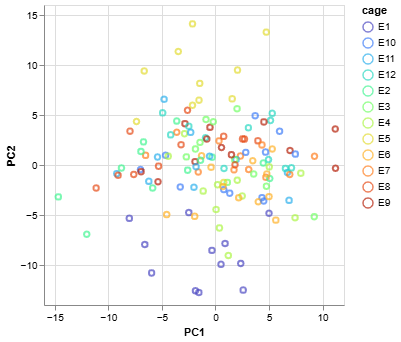